In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toyota-corolla/ToyotaCorolla.csv


In [2]:
df=pd.read_csv("/kaggle/input/toyota-corolla/ToyotaCorolla.csv")

In [3]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [5]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
113,24950,8,13253,Diesel,116,1,0,2000,5,1320


In [18]:
df.drop_duplicates(df,inplace=True)

In [19]:
df.shape

(1435, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   FuelType   1435 non-null   object
 4   HP         1435 non-null   int64 
 5   MetColor   1435 non-null   int64 
 6   Automatic  1435 non-null   int64 
 7   CC         1435 non-null   int64 
 8   Doors      1435 non-null   int64 
 9   Weight     1435 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 123.3+ KB


In [21]:
#Fueltype is object
df.FuelType.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [22]:
#Import label encoder 
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['FuelType']= label_encoder.fit_transform(df['FuelType']) 
  
df['FuelType'].unique()


array([1, 2, 0])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1435 non-null   int64
 1   Age        1435 non-null   int64
 2   KM         1435 non-null   int64
 3   FuelType   1435 non-null   int64
 4   HP         1435 non-null   int64
 5   MetColor   1435 non-null   int64
 6   Automatic  1435 non-null   int64
 7   CC         1435 non-null   int64
 8   Doors      1435 non-null   int64
 9   Weight     1435 non-null   int64
dtypes: int64(10)
memory usage: 123.3 KB


**Correlation Matrix**

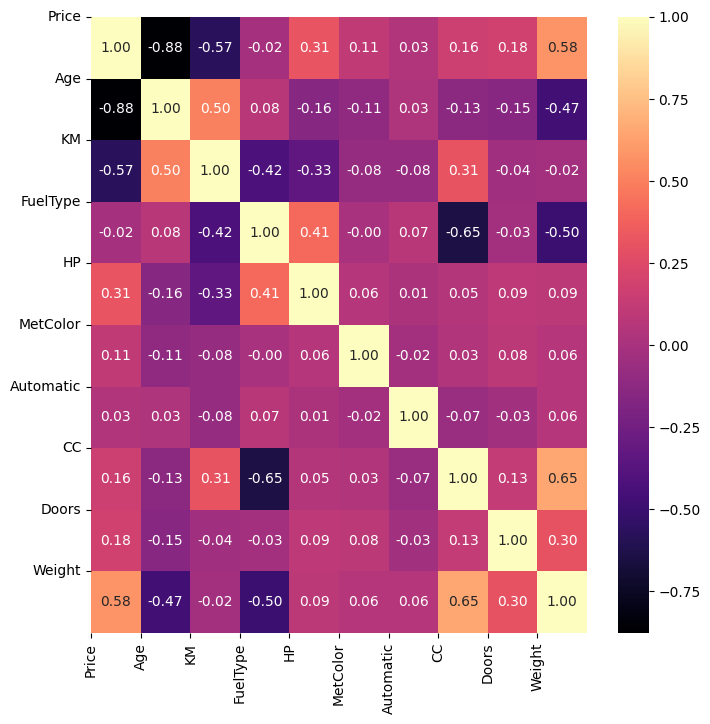

In [28]:
# Check Correlation amoung parameters
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

As shown in the heat map,price and age only have good correlation.

**Pair Plot**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

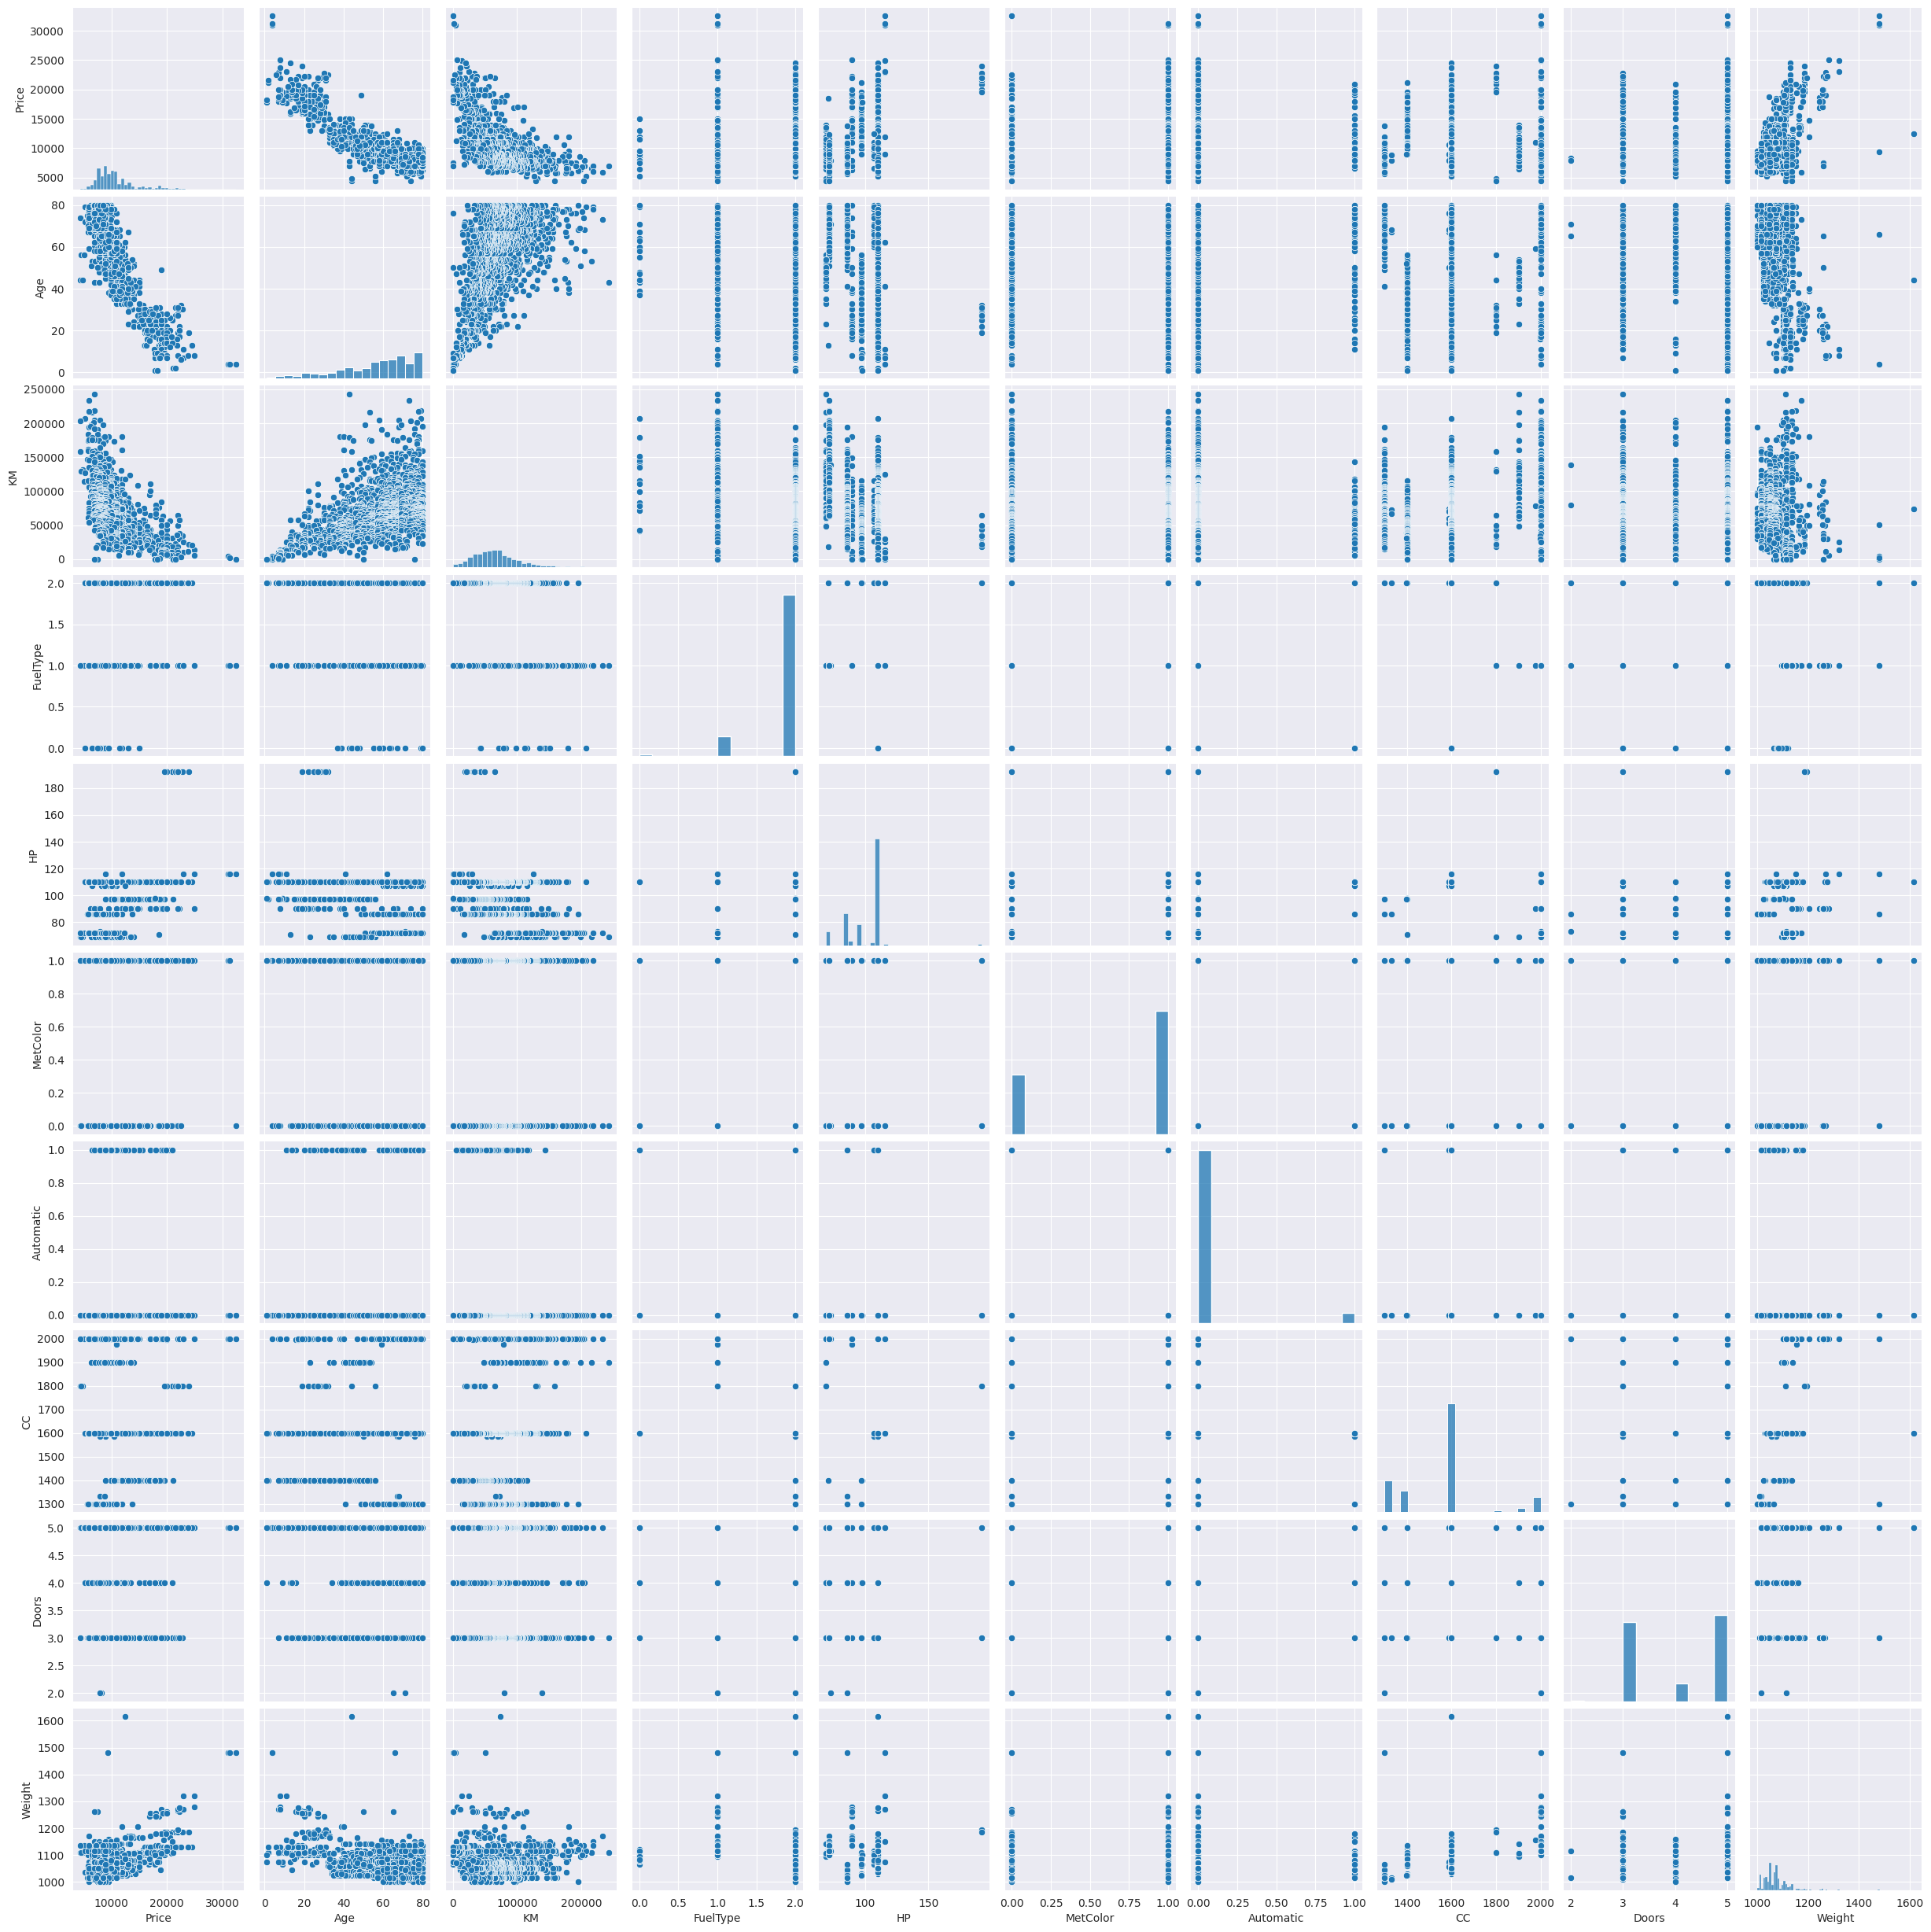

In [29]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

**Model Building**

In [32]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [34]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+FuelType+HP+MetColor+Automatic+CC+Doors+Weight',data=df).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1010.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:04:23   Log-Likelihood:                -12356.
No. Observations:                1435   AIC:                         2.473e+04
Df Residuals:                    1425   BIC:                         2.478e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7092.2283   1201.942     -5.901      0.000   -9449.995   -4734.462
Age         -122.9957      2.632    -46.738      0.000    -128.158    -117.833
KM            -0.0159      0.001    -11.993      0.000      -0.019      -0.013
FuelType     304.7015    162.877      1.871      0.062     -14.804     624.207
HP            29.7541      3.001      9.914      0.000      23.867      35.642
MetColor      37.2752     75.836      0.492      0.623    -111.486     186.037
Automatic    184.3909    157.246      1.173      0.241    -124.067     492.849
CC            -1.3525      0.316     -4.282      0.000      -1.972      -0.733
Doors        -64.5818     39.496     -1.635      0.102    -142.058      12.894
Weight        22.8917      1.119     20.452      0.000      20.696      25.087
==============================================================================
Omnibus:                      358.503   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4910.680
Skew:                          -0.767   Prob(JB):                         0.00
Kurtosis:                      11.932   Cond. No.                     2.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared and Adjusted R sqyared values are pretty good,AIC and BIC values are also less,P value is also significant.But in individual contribution,MetColor/Automatic/Doors have p value more than 0.05.So,Let's build a models individually to see whether they are contributing enough to predict the Y value for the Model or Not.

**Simple Linear Regression Models**

In [36]:
#Build model
model_metcolor = smf.ols('Price~MetColor',data=df).fit()

In [37]:
model_metcolor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.79
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           4.42e-05
Time:                        12:13:45   Log-Likelihood:                -13782.
No. Observations:                1435   AIC:                         2.757e+04
Df Residuals:                    1433   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.016e+04    166.081     61.187      0.000    9836.260    1.05e+04
MetColor     828.4880    202.212      4.097      0.000     431.825    1225.151
==============================================================================
Omnibus:                      479.793   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1514.091
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                       6.747   Cond. No.                         3.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model_automatic=smf.ols('Price~Automatic',data=df).fit()

In [40]:
model_automatic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.651
Date:                Tue, 06 Aug 2024   Prob (F-statistic):              0.199
Time:                        12:37:36   Log-Likelihood:                -13789.
No. Observations:                1435   AIC:                         2.758e+04
Df Residuals:                    1433   BIC:                         2.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.069e+04     98.014    109.078      0.000    1.05e+04    1.09e+04
Automatic    533.4486    415.114      1.285      0.199    -280.848    1347.745
==============================================================================
Omnibus:                      483.899   Durbin-Watson:                   0.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1520.831
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                       6.730   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model_doors=smf.ols('Price~Doors',data=df).fit()

In [42]:
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.40e-12
Time:                        12:39:05   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above,we can observe these independent variables have very low R squared values.Let's Reconfirm with VIF and Q-Q plot.

**VIF**

In [43]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [44]:
rsq_Age = smf.ols('Age~KM+FuelType+HP+MetColor+Automatic+CC+Doors+Weight',data=df).fit().rsquared
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age+FuelType+HP+MetColor+Automatic+CC+Doors+Weight',data=df).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_FuelType = smf.ols('FuelType~Age+KM+HP+MetColor+Automatic+CC+Doors+Weight',data=df).fit().rsquared
vif_FuelType = 1/(1-rsq_FuelType) 

rsq_HP = smf.ols('HP~Age+KM+FuelType+MetColor+Automatic+CC+Doors+Weight',data=df).fit().rsquared
vif_HP = 1/(1-rsq_HP) 

rsq_MetColor = smf.ols('MetColor~Age+KM+FuelType+HP+Automatic+CC+Doors+Weight',data=df).fit().rsquared
vif_MetColor = 1/(1-rsq_MetColor)

rsq_Automatic = smf.ols('Automatic~Age+KM+FuelType+HP+MetColor+CC+Doors+Weight',data=df).fit().rsquared
vif_Automatic = 1/(1-rsq_Automatic) 

rsq_CC = smf.ols('CC~Age+KM+FuelType+HP+MetColor+Automatic+Doors+Weight',data=df).fit().rsquared
vif_CC = 1/(1-rsq_CC) 

rsq_Doors = smf.ols('Doors~Age+KM+FuelType+HP+MetColor+Automatic+CC+Weight',data=df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors) 

rsq_Weight = smf.ols('Weight~Age+KM+FuelType+HP+MetColor+Automatic+CC+Doors',data=df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables':['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],'VIF':[vif_Age,vif_KM,vif_FuelType,vif_HP,vif_MetColor,vif_Automatic,vif_CC,vif_Doors,vif_Weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.927540
1,KM,2.007827
2,FuelType,2.949209
3,HP,1.632997
4,MetColor,1.020447
5,Automatic,1.052054
6,CC,2.815175
7,Doors,1.143493
8,Weight,2.762871


**Residual Analysis**

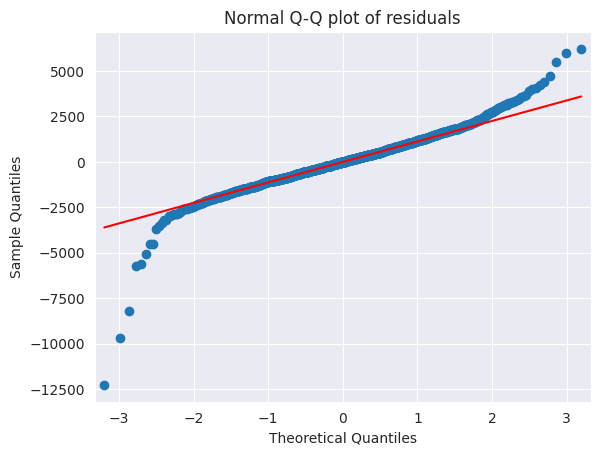

In [45]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [46]:
list(np.where(model.resid>3750))

[array([ 109,  110,  111,  114,  124,  146,  170,  522, 1057])]

**Residual Plot to check Homoscedacity**

In [47]:
def standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

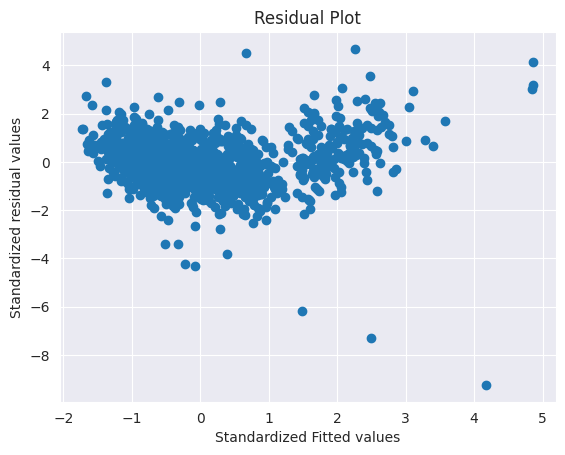

In [48]:
plt.scatter(standardized_values(model.fittedvalues),
            standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

The errors have almost constant variance except some outliers.

**Residual Vs Regressors**

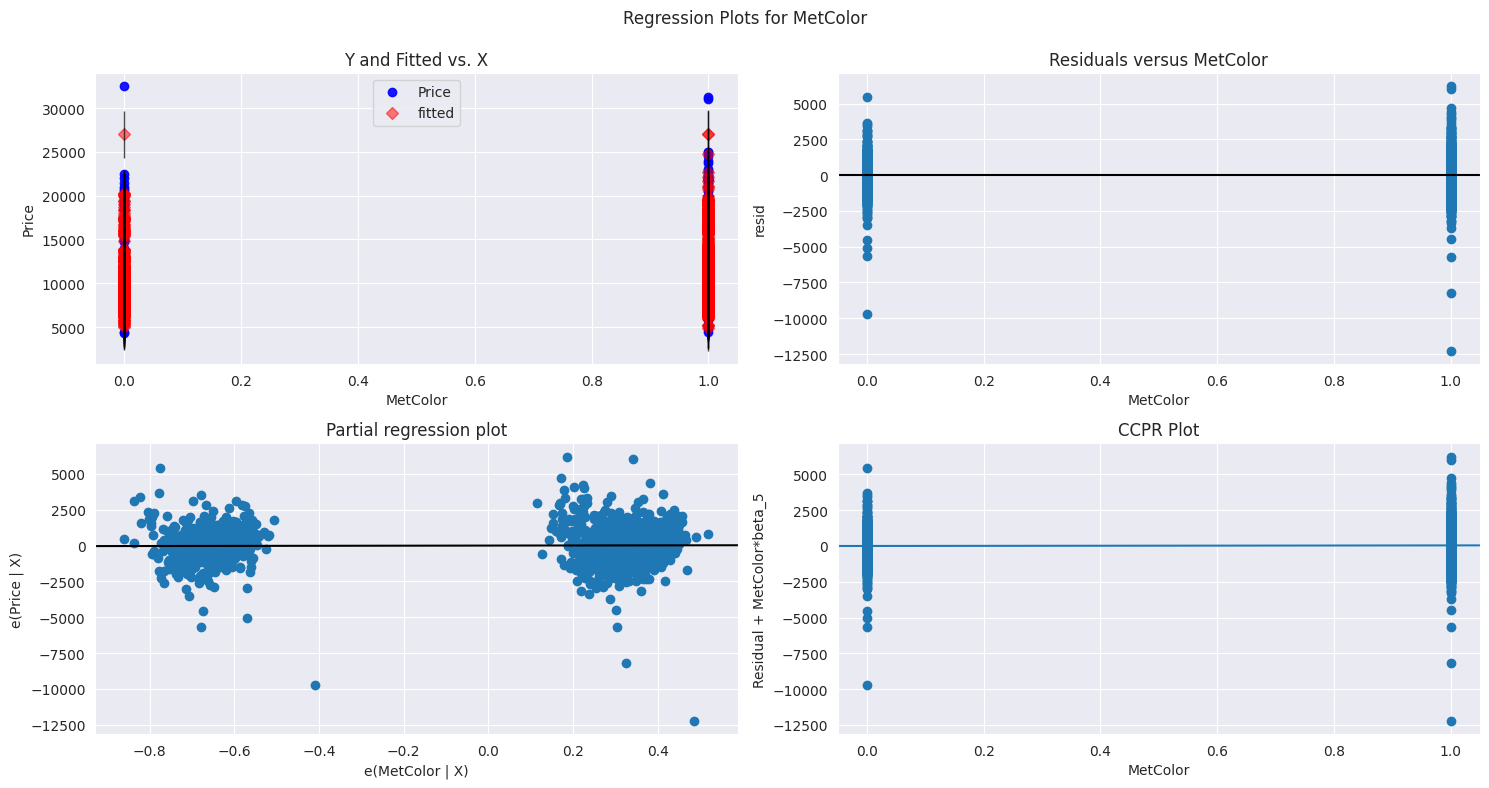

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MetColor", fig=fig)
plt.show()

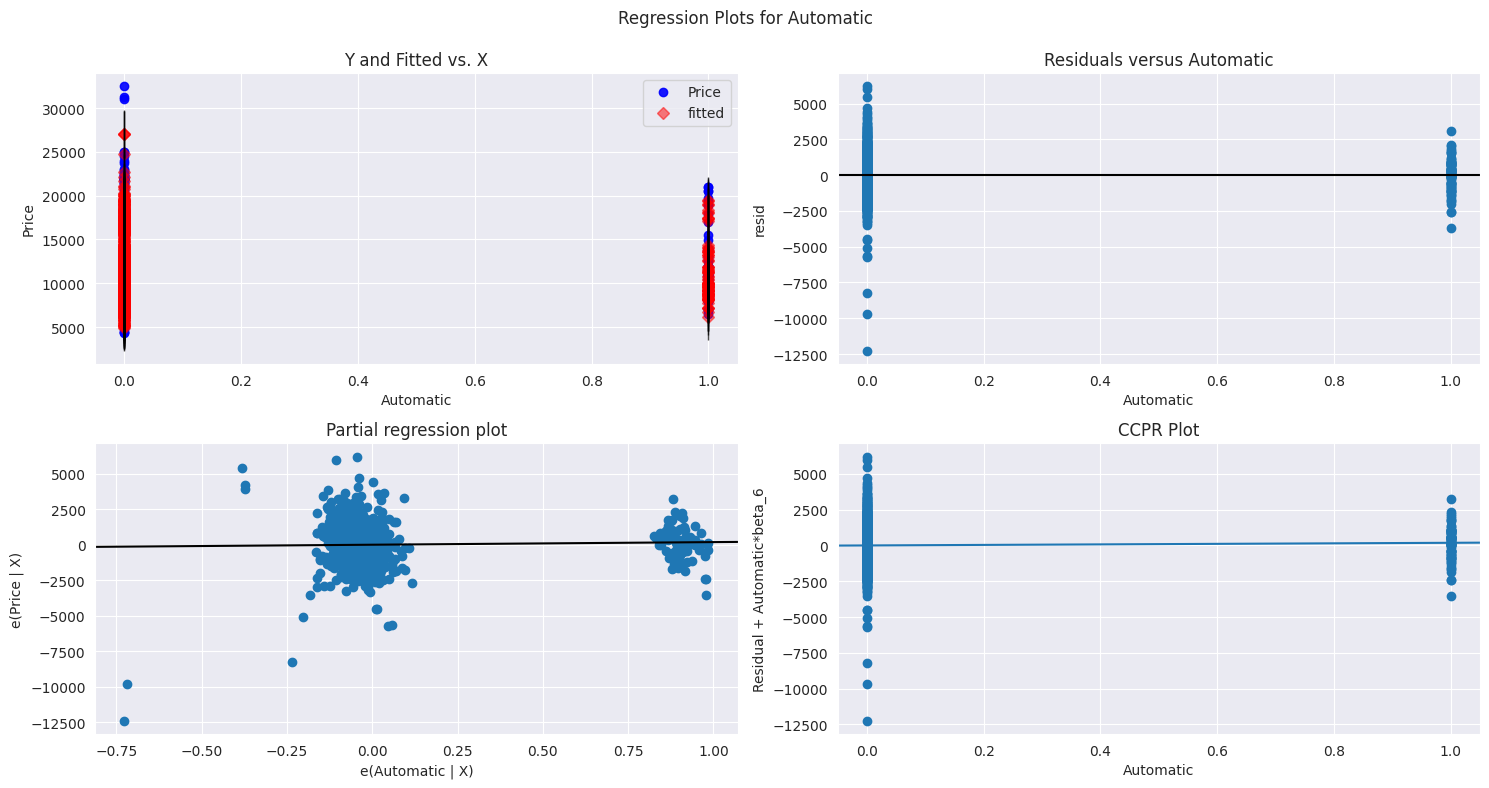

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Automatic", fig=fig)
plt.show()

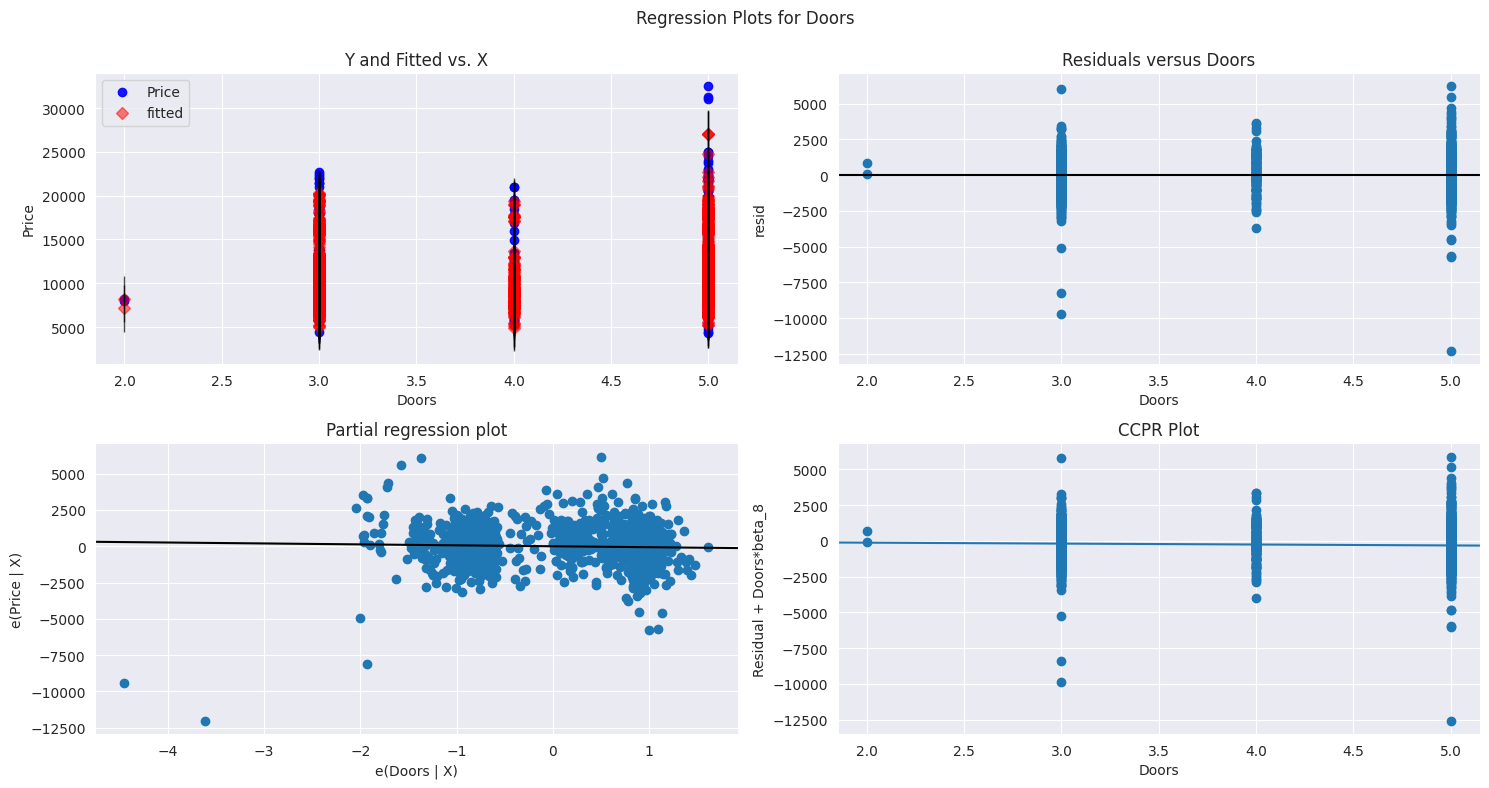

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In the above plot the mean variance is almost constant.Hence we can say they are not contributing anything to predict output variable.So,we can build a new model without these.

**Cook's Distance:**

For Outlier Detection

In [54]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

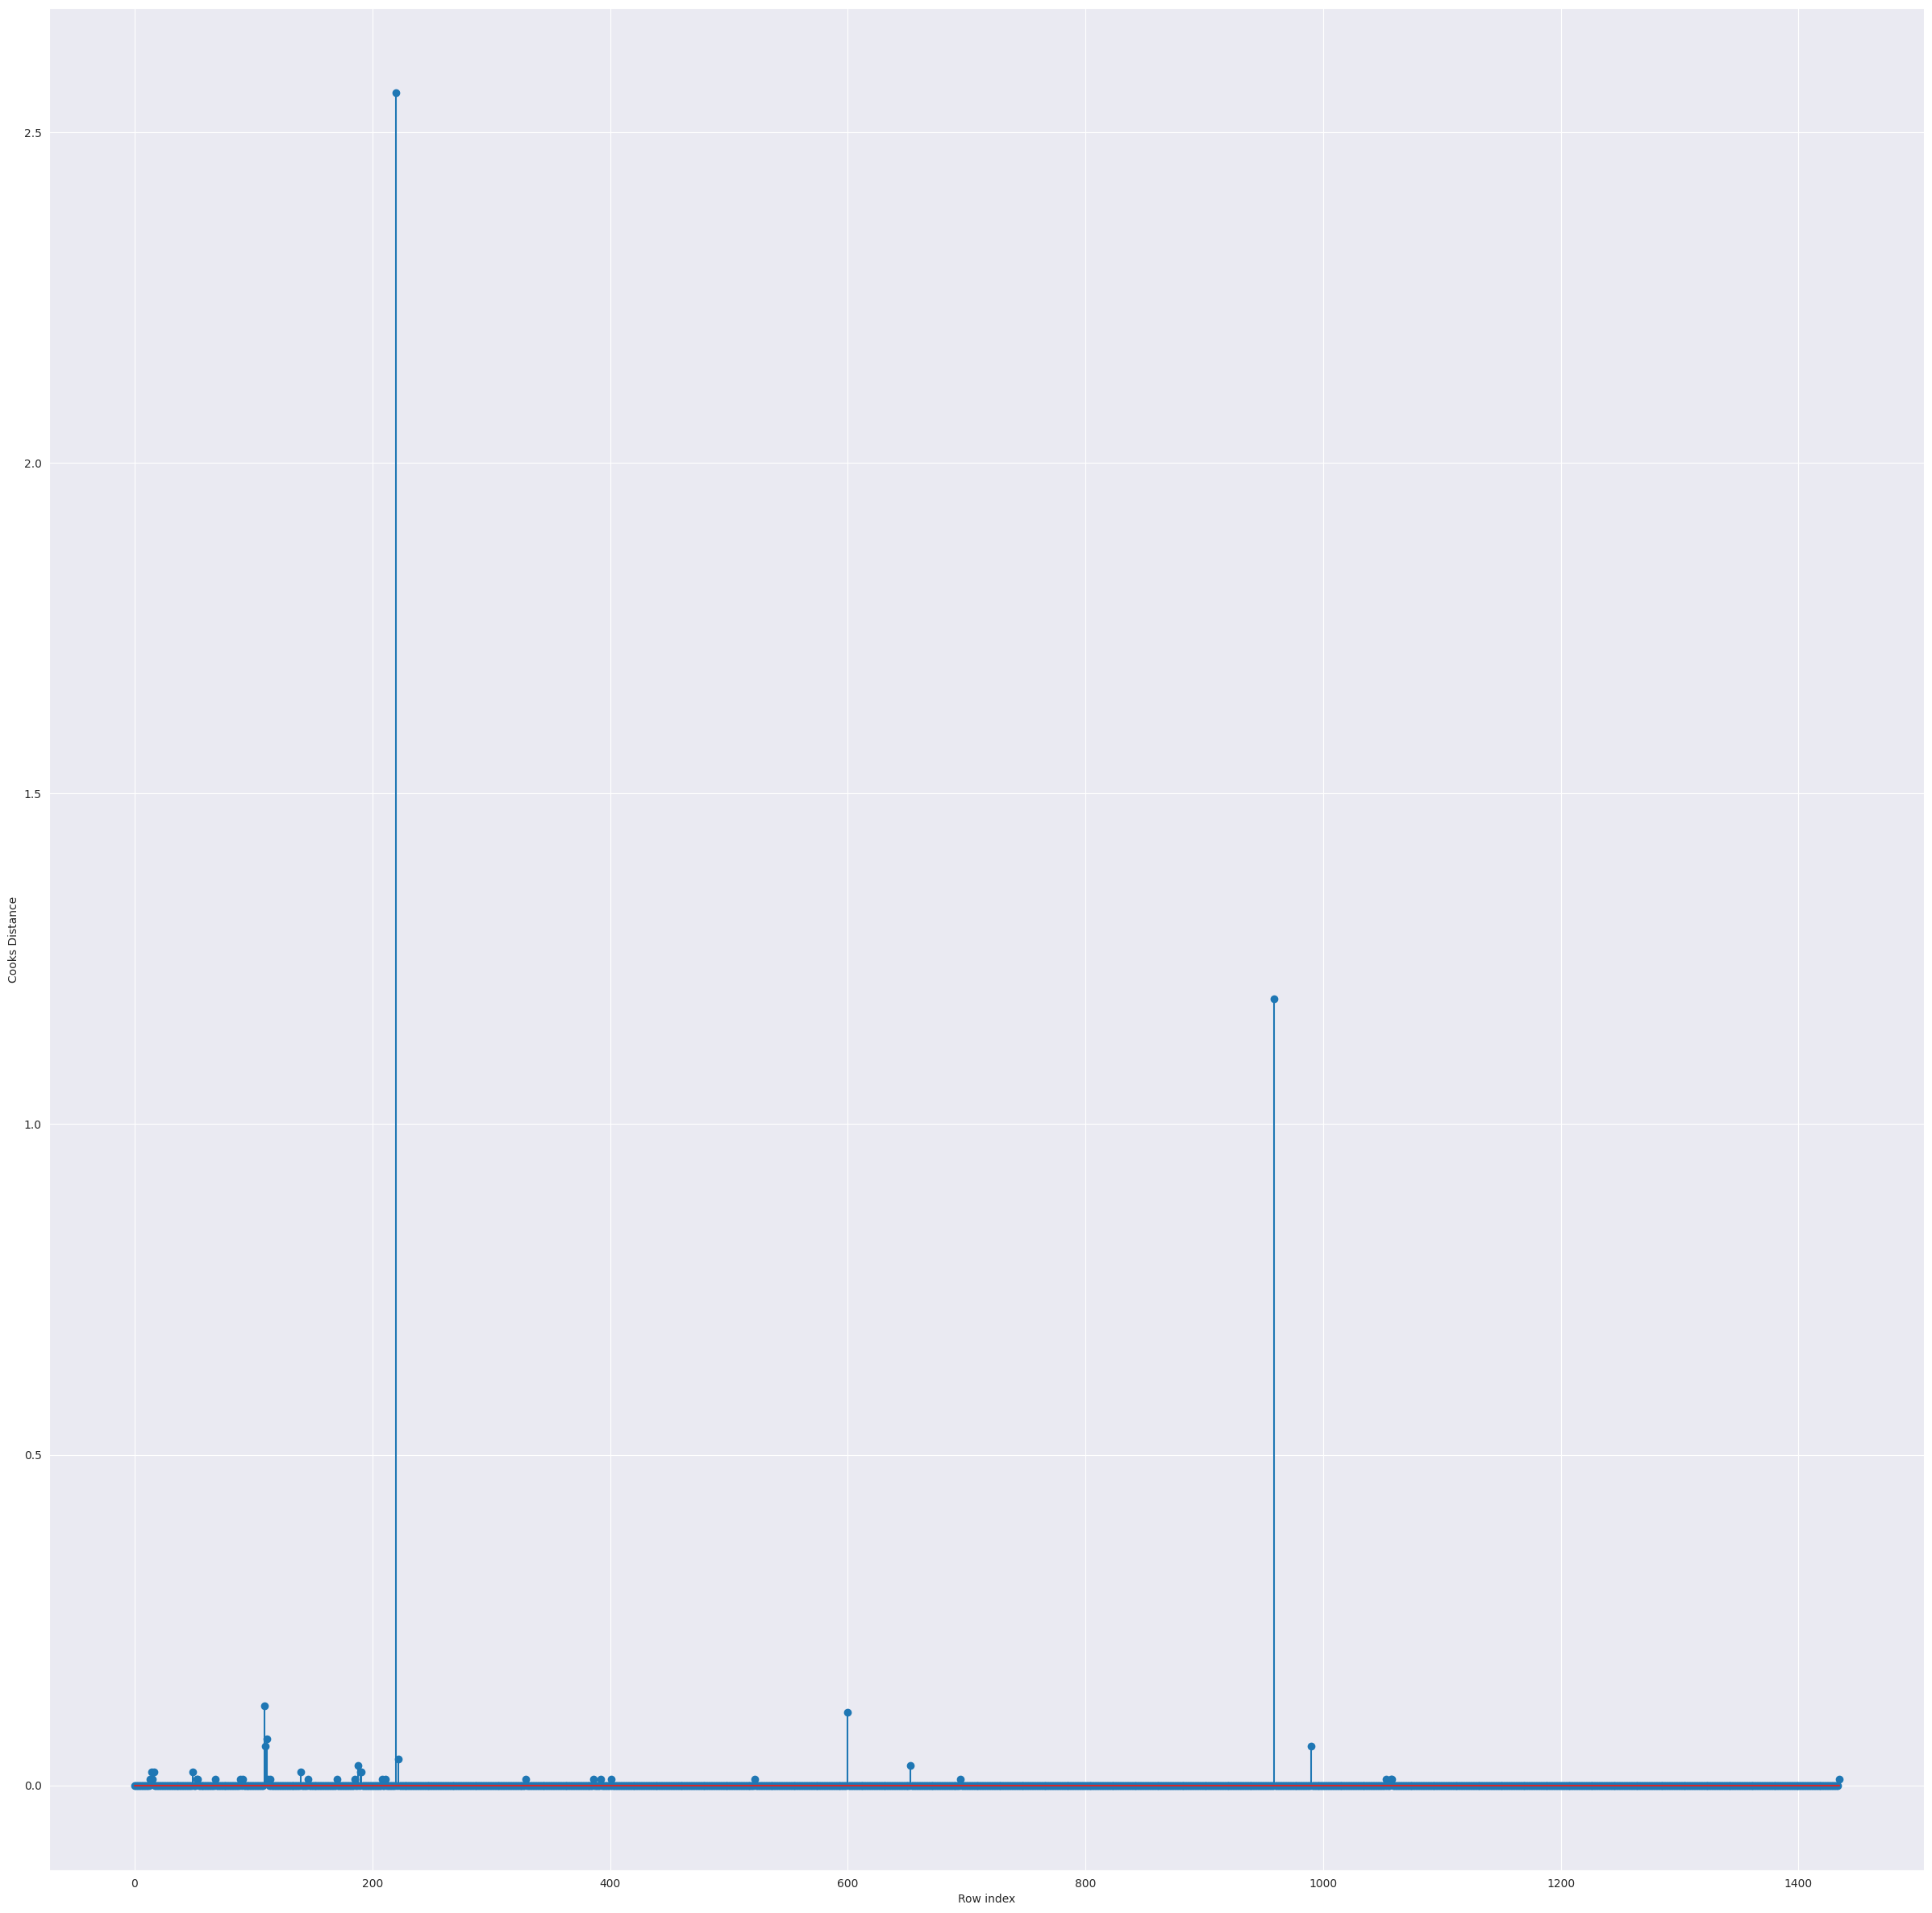

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(30, 30))
plt.stem(np.arange(len(df)), np.round(c, 2))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
#index and value of influencer where c is more than 2.5
(np.argmax(c),np.max(c))

(220, 2.5555119727347955)

Another Method to find High influence Point in our model.

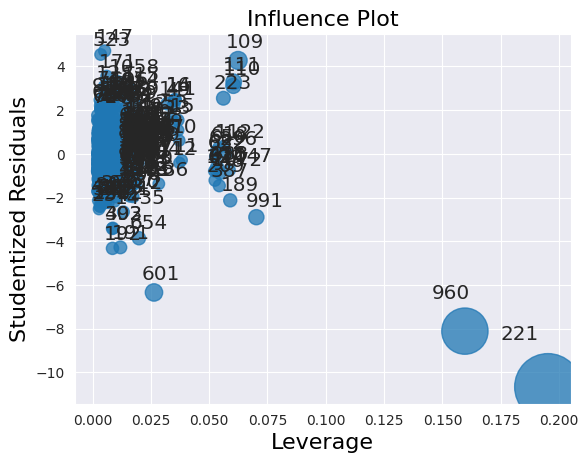

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

So,now 221 and 960 are the High inflence points in our model.

In [64]:
df[df.index.isin([221, 960])]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
221,12450,44,74172,2,110,1,0,1600,5,1615
960,9390,66,50806,2,86,0,0,1300,3,1480


In [106]:
df1=df.drop(df.index[[220,221]],axis=0).reset_index()

In [107]:
df1.head()

,index,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23,46986,1,90,1,0,2000,3,1165
1,1,13750,23,72937,1,90,1,0,2000,3,1165
2,2,13950,24,41711,1,90,1,0,2000,3,1165
3,3,14950,26,48000,1,90,0,0,2000,3,1165
4,4,13750,30,38500,1,90,0,0,2000,3,1170


In [108]:
df1=df1.drop(['index'],axis=1)

In [109]:
df1.shape

(1433, 10)

Let's Build our new Model based on the above observations.

In [110]:
#Build the model on the new data
final_model= smf.ols('Price~Age+KM+FuelType+HP+CC+Weight',data = df1).fit()

In [111]:
#Again check for influencers
model_influence = final_model.get_influence()
(c, _) = model_influence.cooks_distance

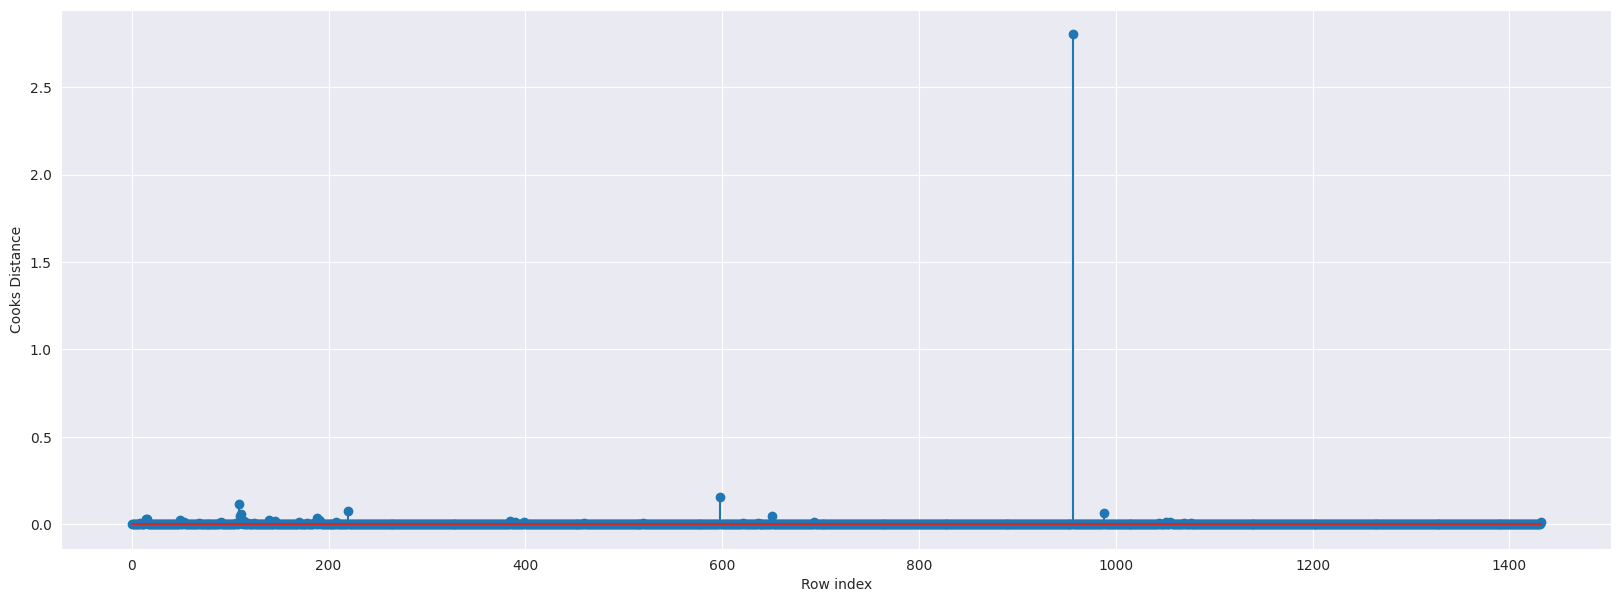

In [112]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [113]:
#index of the data points where c is more than 3
(np.argmax(c),np.max(c))

(957, 2.8030729296765062)

We can finalize this Model.

In [133]:
#Check the accuracy of the mode
final_model= smf.ols('Price~Age+KM+FuelType+HP+CC+Weight',data = df1).fit()

In [134]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1645.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:08:20   Log-Likelihood:                -12289.
No. Observations:                1433   AIC:                         2.459e+04
Df Residuals:                    1426   BIC:                         2.463e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.17e+04   1218.377     -9.606      0.000   -1.41e+04   -9313.229
Age         -118.7225      2.542    -46.697      0.000    -123.710    -113.735
KM            -0.0154      0.001    -12.024      0.000      -0.018      -0.013
FuelType     476.0495    157.056      3.031      0.002     167.964     784.135
HP            28.4349      2.896      9.819      0.000      22.754      34.116
CC            -1.9847      0.309     -6.419      0.000      -2.591      -1.378
Weight        27.4830      1.121     24.526      0.000      25.285      29.681
==============================================================================
Omnibus:                      297.899   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3382.932
Skew:                          -0.623   Prob(JB):                         0.00
Kurtosis:                      10.423   Cond. No.                     2.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1010.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:08:21   Log-Likelihood:                -12356.
No. Observations:                1435   AIC:                         2.473e+04
Df Residuals:                    1425   BIC:                         2.478e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7092.2283   1201.942     -5.901      0.000   -9449.995   -4734.462
Age         -122.9957      2.632    -46.738      0.000    -128.158    -117.833
KM            -0.0159      0.001    -11.993      0.000      -0.019      -0.013
FuelType     304.7015    162.877      1.871      0.062     -14.804     624.207
HP            29.7541      3.001      9.914      0.000      23.867      35.642
MetColor      37.2752     75.836      0.492      0.623    -111.486     186.037
Automatic    184.3909    157.246      1.173      0.241    -124.067     492.849
CC            -1.3525      0.316     -4.282      0.000      -1.972      -0.733
Doors        -64.5818     39.496     -1.635      0.102    -142.058      12.894
Weight        22.8917      1.119     20.452      0.000      20.696      25.087
==============================================================================
Omnibus:                      358.503   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4910.680
Skew:                          -0.767   Prob(JB):                         0.00
Kurtosis:                      11.932   Cond. No.                     2.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comparing the Two models model and final_model,final_model has hight R squared and Adjusted R squared value and AIC,BIC values also reduced a bit.All the independent variables have significant probability which are less than 0.05.

**Cross Validation**

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train,test=train_test_split(df1,test_size=0.3,random_state=8)
print(train.shape)
print(test.shape)

(1003, 10)
(430, 10)


In [138]:
def rmse(error):
    return np.sqrt((error*error).mean())

In [139]:
train_error=final_model.resid
train_rmse=rmse(train_error)
print(train_rmse)

1282.6037306000258


In [160]:
test_a=test.iloc[:,[1,2,3,4,5,6,7,8,9]]

In [161]:
test_a.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
145,20,20000,2,110,0,1,1600,5,1165
623,58,133405,1,72,1,0,2000,5,1135
282,39,45081,2,110,1,0,1600,5,1075
131,19,29441,2,97,1,0,1400,5,1110
611,64,150585,2,110,1,0,1600,3,1065


In [162]:
test_error=test.Price-final_model.predict(test_a)
test_rmse=rmse(test_error)
print(test_rmse)

1225.964602582002


In [163]:
print(train_rmse,test_rmse)

1282.6037306000258 1225.964602582002


So here,the test_rmse is less than the train_rmse.We can finalize this Model.

In [164]:
final_model= smf.ols('Price~Age+KM+FuelType+HP+CC+Weight',data = df1).fit()